**Load Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

****

**Import Required Datasets**

In [3]:
# read train, test and sample submission data
train = pd.read_csv('train.csv') 
sample_sub = pd.read_csv('sample_submission.csv')
train.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,...,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,...,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [4]:
test = pd.read_csv('test.csv')
test.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,customer_id_32884,59,technician,married,high.school,no,no,yes,cellular,may,...,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,customer_id_3169,57,unknown,married,unknown,unknown,yes,no,telephone,may,...,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,customer_id_32206,35,blue-collar,married,basic.9y,no,no,no,cellular,may,...,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,customer_id_9403,38,admin.,married,high.school,no,no,no,telephone,jun,...,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,customer_id_14020,29,housemaid,married,high.school,no,yes,no,cellular,jul,...,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     28831 non-null  object 
 1   age             28831 non-null  int64  
 2   job             28831 non-null  object 
 3   marital         28831 non-null  object 
 4   education       28831 non-null  object 
 5   default         28831 non-null  object 
 6   housing         28831 non-null  object 
 7   loan            28831 non-null  object 
 8   contact         28831 non-null  object 
 9   month           28831 non-null  object 
 10  day_of_week     28831 non-null  object 
 11  duration        28831 non-null  float64
 12  campaign        28831 non-null  int64  
 13  pdays           28831 non-null  int64  
 14  previous        28831 non-null  int64  
 15  poutcome        28831 non-null  object 
 16  emp_var_rate    28831 non-null  float64
 17  cons_price_idx  28831 non-null 

In [6]:
train.shape

(28831, 22)

In [7]:
train.isna().sum()

customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
subscribed        0
dtype: int64

In [8]:
train.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [9]:
train.columns.nunique()

22

In [10]:
test.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,customer_id_32884,59,technician,married,high.school,no,no,yes,cellular,may,...,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,customer_id_3169,57,unknown,married,unknown,unknown,yes,no,telephone,may,...,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,customer_id_32206,35,blue-collar,married,basic.9y,no,no,no,cellular,may,...,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,customer_id_9403,38,admin.,married,high.school,no,no,no,telephone,jun,...,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,customer_id_14020,29,housemaid,married,high.school,no,yes,no,cellular,jul,...,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12357 entries, 0 to 12356
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     12357 non-null  object 
 1   age             12357 non-null  int64  
 2   job             12357 non-null  object 
 3   marital         12357 non-null  object 
 4   education       12357 non-null  object 
 5   default         12357 non-null  object 
 6   housing         12357 non-null  object 
 7   loan            12357 non-null  object 
 8   contact         12357 non-null  object 
 9   month           12357 non-null  object 
 10  day_of_week     12357 non-null  object 
 11  duration        12357 non-null  float64
 12  campaign        12357 non-null  int64  
 13  pdays           12357 non-null  int64  
 14  previous        12357 non-null  int64  
 15  poutcome        12357 non-null  object 
 16  emp_var_rate    12357 non-null  float64
 17  cons_price_idx  12357 non-null 

In [12]:
test.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

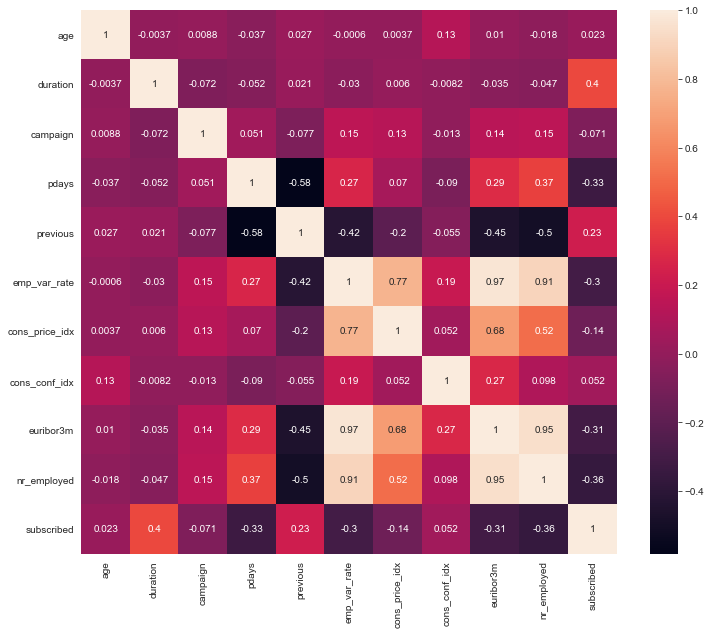

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=True)

 
 
 
 ****

**Concatenate Train and Test Datasets**

In [14]:
test['subscribed'] = 'test'
data = pd.concat([train, test]).reset_index(drop=True)
data.head(10)

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,...,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,...,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
5,customer_id_24606,48,entrepreneur,married,university.degree,no,yes,yes,cellular,nov,...,2,999,1,failure,-0.07,46.6000,-29.40,5.193,5195.8,0
6,customer_id_13094,34,blue-collar,single,basic.4y,unknown,no,no,cellular,jul,...,2,999,0,nonexistent,1.43,46.9590,-29.89,5.964,5228.1,0
7,customer_id_36912,34,technician,single,professional.course,no,no,no,cellular,jun,...,1,999,0,nonexistent,-2.87,46.4815,-28.56,2.217,5076.2,0
8,customer_id_27834,39,unemployed,single,university.degree,no,yes,no,cellular,mar,...,1,999,0,nonexistent,-1.77,46.4215,-35.00,2.642,5099.1,0
9,customer_id_9302,40,technician,single,professional.course,no,unknown,unknown,telephone,jun,...,3,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1,0


In [15]:
data.columns.nunique()

22

In [16]:
data.isna().sum()

customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
subscribed        0
dtype: int64

In [17]:
data['subscribed'].value_counts(normalize=True, dropna=False)

0       0.621055
test    0.300015
1       0.078931
Name: subscribed, dtype: float64

**Ref: Data Shape before dropping columns**

In [18]:
data.shape

(41188, 22)

In [19]:
train.shape

(28831, 22)

In [20]:
test.shape

(12357, 22)

In [21]:
data.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [22]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [23]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [24]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [25]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [26]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [27]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [28]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

****

**Calculate Call Duration as Int and append to list**

In [29]:
y = []
# y = np.array(list(int(x)))

for x in data['duration']:
    y.append(int(x))
print(np.array(y))

[1 0 4 ... 4 0 3]


In [30]:
ydf = pd.DataFrame(y, columns=['Call Duration'])
ydf

,Call Duration
0,1
1,0
2,4
3,1
4,19
...,...
41183,3
41184,10
41185,4
41186,0


In [31]:
ydf['Call Duration'].value_counts()

1     8614
2     7793
3     5505
0     4181
4     3845
5     2680
6     1920
7     1341
8     1025
9      806
10     662
11     515
12     411
13     347
14     259
15     209
16     170
17     146
18     134
19     110
20      91
22      66
21      65
24      44
23      42
26      34
25      33
28      17
30      15
27      15
32      13
33      11
31      10
29       7
34       7
36       5
40       4
41       4
38       3
35       3
44       3
51       3
43       2
37       2
54       2
60       2
63       1
69       1
39       1
47       1
48       1
81       1
53       1
55       1
56       1
57       1
58       1
46       1
Name: Call Duration, dtype: int64

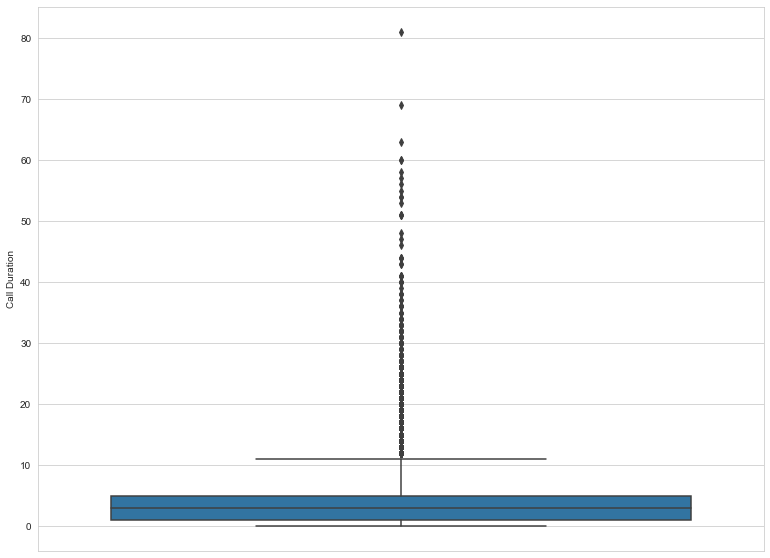

In [32]:
plt.figure(figsize=(13,10))
sns.boxplot(ydf['Call Duration'], orient='v')

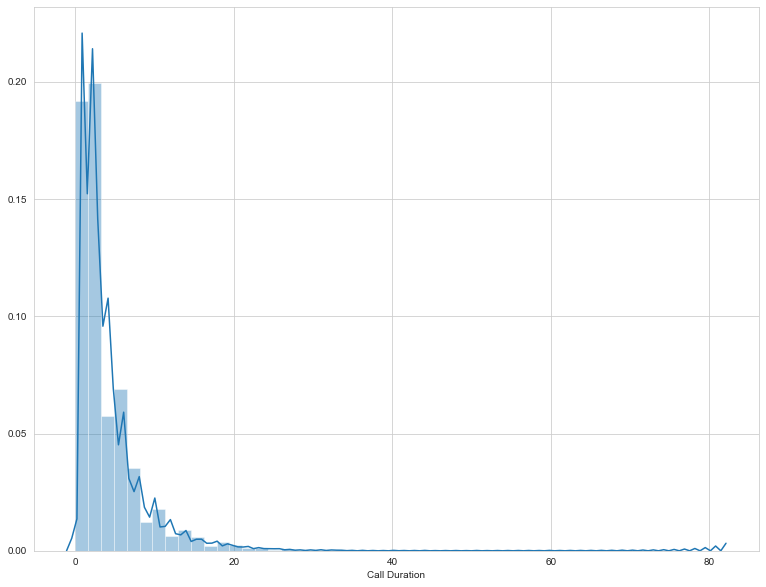

In [33]:
plt.figure(figsize=(13,10))
sns.distplot(ydf['Call Duration'])

****

# Drop Unrequired Columns from whole dataset

In [34]:
# to ensure that some features only contain discrete variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     41188 non-null  object 
 1   age             41188 non-null  int64  
 2   job             41188 non-null  object 
 3   marital         41188 non-null  object 
 4   education       41188 non-null  object 
 5   default         41188 non-null  object 
 6   housing         41188 non-null  object 
 7   loan            41188 non-null  object 
 8   contact         41188 non-null  object 
 9   month           41188 non-null  object 
 10  day_of_week     41188 non-null  object 
 11  duration        41188 non-null  float64
 12  campaign        41188 non-null  int64  
 13  pdays           41188 non-null  int64  
 14  previous        41188 non-null  int64  
 15  poutcome        41188 non-null  object 
 16  emp_var_rate    41188 non-null  float64
 17  cons_price_idx  41188 non-null 

In [35]:
data.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [36]:
data.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,...,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,...,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [37]:
data['subscribed'].value_counts()

0       25580
test    12357
1        3251
Name: subscribed, dtype: int64

In [38]:
data = data.drop(['customer_id', 'day_of_week', 'emp_var_rate',
                  'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'], axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,subscribed
0,31,admin.,married,university.degree,no,no,no,cellular,dec,1.283333,3,999,1,failure,0
1,31,technician,single,university.degree,no,no,no,telephone,may,0.200000,4,999,0,nonexistent,0
2,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,4.616667,2,999,0,nonexistent,0
3,36,services,married,university.degree,no,no,no,cellular,may,1.166667,1,999,1,failure,0
4,34,admin.,single,high.school,no,no,no,cellular,may,19.683333,9,999,0,nonexistent,0


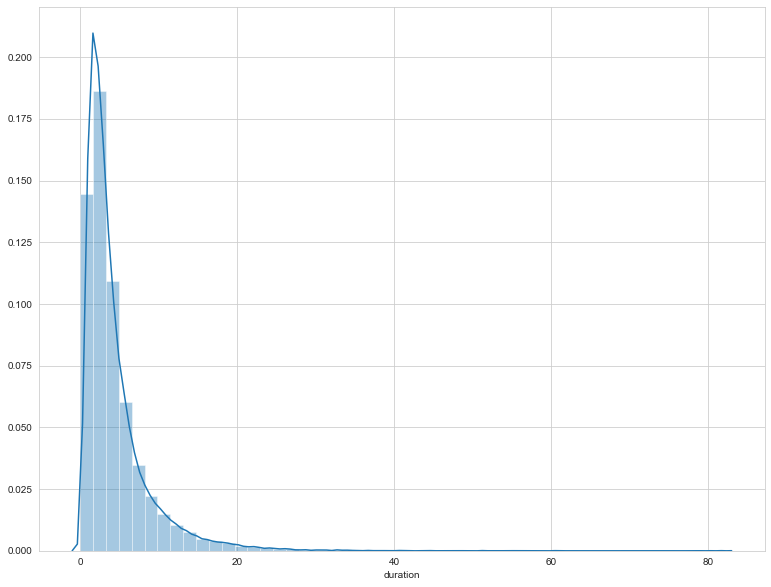

In [39]:
#checking distribution of numerical variables to see if a standard scaler would be okay
plt.figure(figsize=(13,10))
sns.distplot(data['duration'])

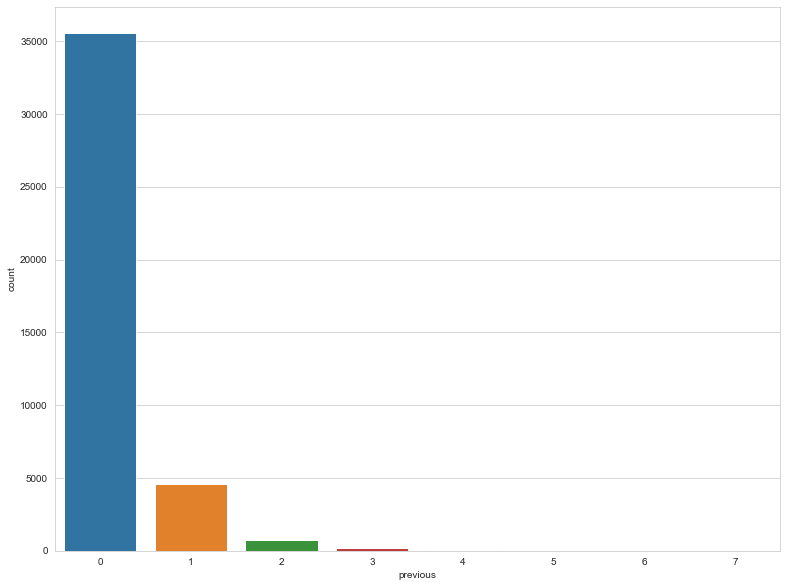

In [40]:
plt.figure(figsize=(13,10))
sns.countplot(data['previous'])

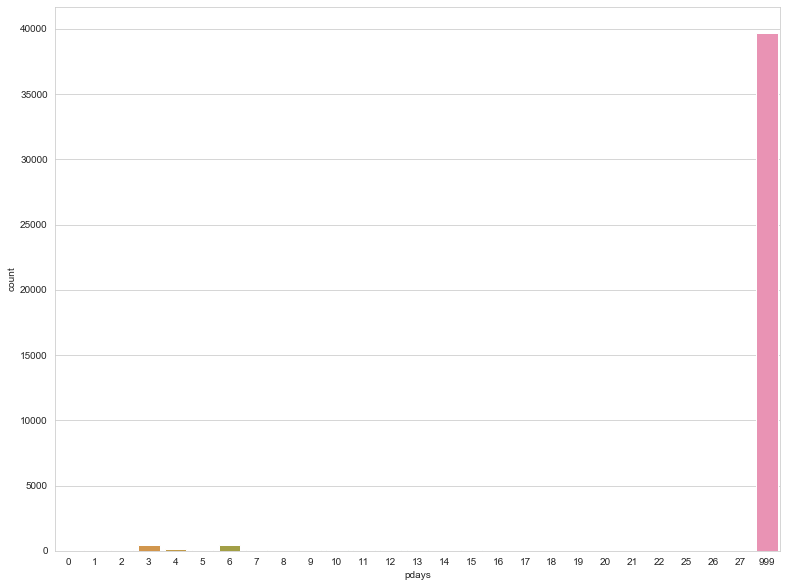

In [41]:
plt.figure(figsize=(13,10))
sns.countplot(data['pdays'])

In [42]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

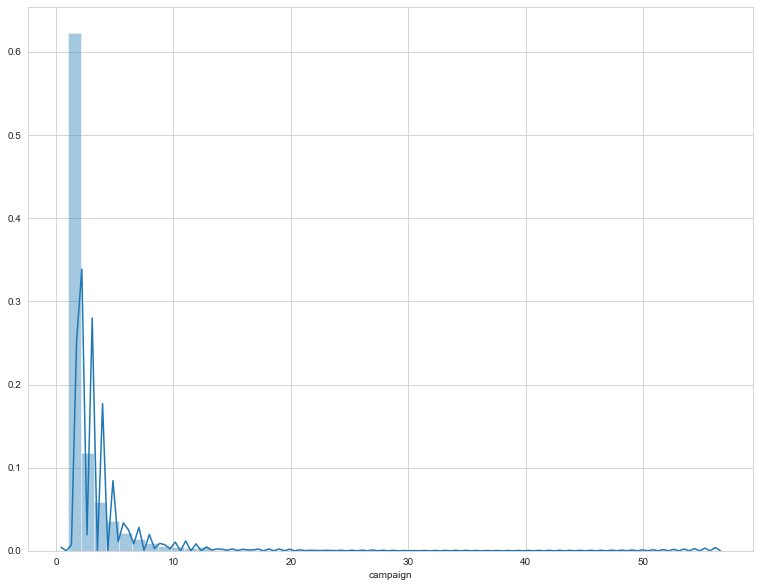

In [43]:
plt.figure(figsize=(13,10))
sns.distplot(data['campaign'])

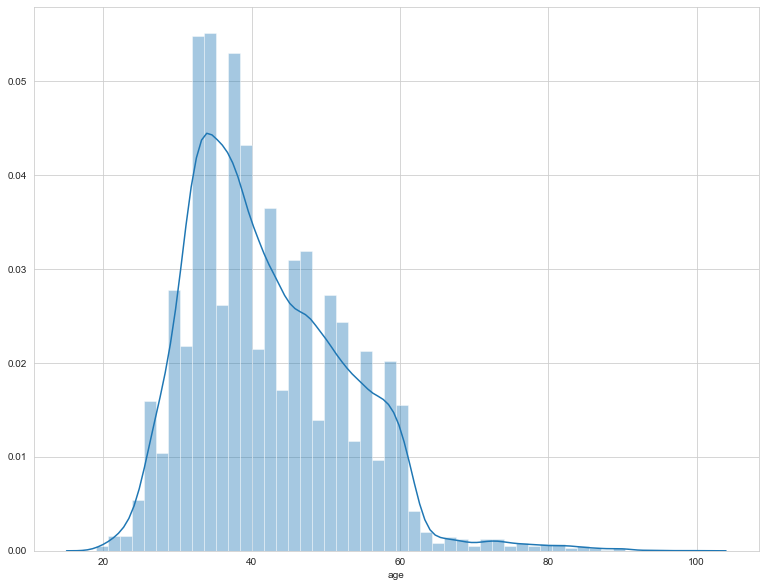

In [44]:
plt.figure(figsize=(13,10))
sns.distplot(data['age'])

## Drop Unknown values across rows

In [45]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'subscribed'],
      dtype='object')

In [46]:
data['job'].value_counts(normalize=True) *100

admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64

In [47]:
data['marital'].value_counts(normalize=True) *100

married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64

In [48]:
data['education'].value_counts(normalize=True) *100

university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: education, dtype: float64

In [49]:
data['default'].value_counts(normalize=True) *100

no         79.120132
unknown    20.872584
yes         0.007284
Name: default, dtype: float64

In [50]:
data['housing'].value_counts(normalize=True) *100

yes        52.384190
no         45.212198
unknown     2.403613
Name: housing, dtype: float64

In [51]:
data['loan'].value_counts(normalize=True) *100

no         82.426920
yes        15.169467
unknown     2.403613
Name: loan, dtype: float64

****

**Replace values for 'Unknown' as NaN and confirm that the values have been replaced**

In [52]:
# data = data.replace(to_replace = 'unknown', value = np.nan)
# data['job'].value_counts(dropna=False)

In [53]:
# data['marital'].value_counts(normalize=True, dropna=False) *100

In [54]:
# data['education'].value_counts(normalize=True, dropna=False) *100

In [55]:
# data['default'].value_counts(normalize=True, dropna=False) *100

In [56]:
# data['housing'].value_counts(normalize=True, dropna=False) *100

In [57]:
# data['loan'].value_counts(normalize=True, dropna=False) *100

## Since we have replaced 'Unknown' values as NaN, we drop NaN values across rows only

In [58]:
data.isna().sum()

age           0
job           0
marital       0
education     0
default       0
housing       0
loan          0
contact       0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [59]:
data.shape

(41188, 15)

In [60]:
data = data.dropna(axis=0)
data.shape

(41188, 15)

In [61]:
data.isna().sum()

age           0
job           0
marital       0
education     0
default       0
housing       0
loan          0
contact       0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# Ref: Perform One-hot encoding

In [62]:
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 
                              'housing', 'loan', 'contact', 'month', 'poutcome'])
data.head()

,age,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31,1.283333,3,999,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,31,0.200000,4,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,47,4.616667,2,999,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,36,1.166667,1,999,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,34,19.683333,9,999,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [63]:
# columns before encoding
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'subscribed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_nonexistent', 'pou

In [64]:
# columns after encoding
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'subscribed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_nonexistent', 'pou

In [65]:
data.head(5)

,age,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31,1.283333,3,999,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,31,0.200000,4,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,47,4.616667,2,999,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,36,1.166667,1,999,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,34,19.683333,9,999,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# Ref: After Encoding, Split data back into Train and Test

In [66]:
train_df = data[(data['subscribed'] != 'test')].reset_index(drop=True)
test_df = data[(data['subscribed'] == 'test')].reset_index(drop=True)

In [67]:
train_df.head()

,age,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31,1.283333,3,999,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,31,0.200000,4,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,47,4.616667,2,999,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,36,1.166667,1,999,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,34,19.683333,9,999,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [68]:
test_df.head()

,age,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,59,6.183333,1,999,1,test,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,4.750000,2,999,0,test,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,35,0.866667,1,999,1,test,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,38,5.916667,4,999,0,test,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,29,3.150000,2,999,0,test,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [69]:
print(train_df.shape, test_df.shape)

(28831, 54) (12357, 54)


# Using Train Dataset only, split Train into X and y

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = train_df.drop(['subscribed'], axis=1)
y = train_df['subscribed'].astype('int')

In [72]:
print(X.shape, y.shape)

(28831, 53) (28831,)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [74]:
X_train.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
19258,57,5.983333,1,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
10063,80,1.716667,1,999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3609,36,6.816667,1,999,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2267,38,0.766667,7,999,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
24919,48,0.116667,7,999,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [75]:
y_train.value_counts()

0    20475
1     2589
Name: subscribed, dtype: int64

# LATER: Getting Data from Test_df for Prediction for submition

# Import Classification Model to be used

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report

import itertools

**Using Decision Tree**

In [77]:
# model variable
model = DecisionTreeClassifier(max_depth=3)

In [78]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            28831 non-null  int64  
 1   duration                       28831 non-null  float64
 2   campaign                       28831 non-null  int64  
 3   pdays                          28831 non-null  int64  
 4   previous                       28831 non-null  int64  
 5   job_admin.                     28831 non-null  uint8  
 6   job_blue-collar                28831 non-null  uint8  
 7   job_entrepreneur               28831 non-null  uint8  
 8   job_housemaid                  28831 non-null  uint8  
 9   job_management                 28831 non-null  uint8  
 10  job_retired                    28831 non-null  uint8  
 11  job_self-employed              28831 non-null  uint8  
 12  job_services                   28831 non-null 

In [80]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: subscribed, dtype: int32

In [81]:
y_pred = model.predict(X_test)

In [82]:
print(accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

0.906190393618866


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5105
           1       0.67      0.37      0.47       662

    accuracy                           0.91      5767
   macro avg       0.79      0.67      0.71      5767
weighted avg       0.89      0.91      0.89      5767



[[4983  122]
 [ 419  243]]


In [83]:
print(f1_score(y_pred, y_test))

0.47322297955209347


### Confusion Matrix for Decision Tree

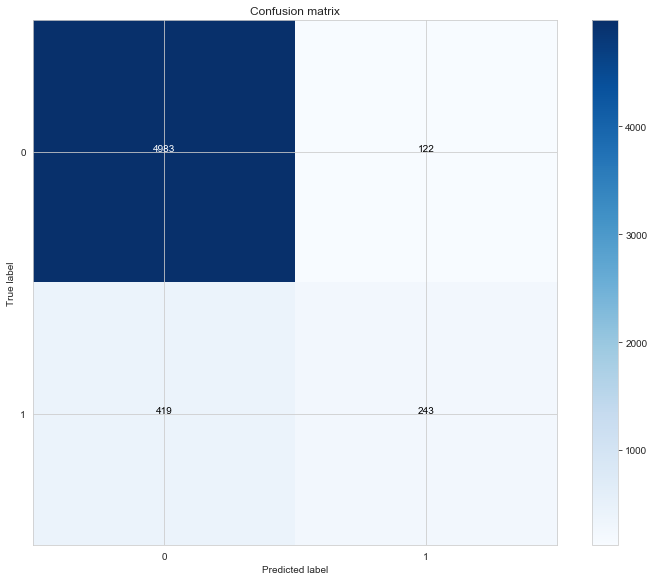

In [84]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)


class_names = [0,1]

plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

### Decision Tree Model Evaluation

In [85]:
print('Train score : ' + str(model.score(X_train, y_train)))
print('Test Score  : ' + str(model.score(X_test, y_test)))

Train score : 0.9071279916753382
Test Score  : 0.906190393618866


In [86]:
print(f1_score(y_pred, y_test))

0.47322297955209347


# Using Logistics Regression 

In [87]:
model1 = LogisticRegression()

In [88]:
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y1_pred = model1.predict(X_test)

In [90]:
print(accuracy_score(y_test, y1_pred))
print('\n')
print(classification_report(y_test, y1_pred))
print('\n')
print(confusion_matrix(y_test, y1_pred))

0.9044563898040575


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5105
           1       0.66      0.34      0.45       662

    accuracy                           0.90      5767
   macro avg       0.79      0.66      0.70      5767
weighted avg       0.89      0.90      0.89      5767



[[4991  114]
 [ 437  225]]


In [91]:
print(f1_score(y1_pred, y_test))

0.44955044955044954


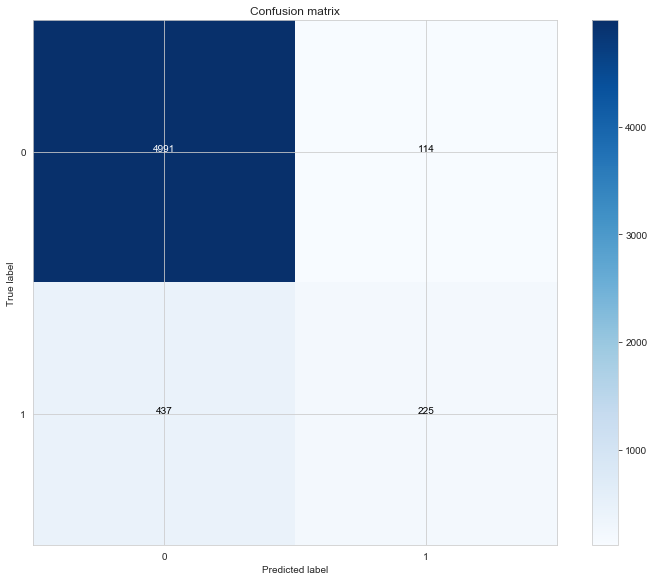

In [92]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y1_pred)
np.set_printoptions(precision=2)


class_names = [0,1]

plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

# Using Random Forest

In [93]:
model2 = RandomForestClassifier()

In [94]:
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
y2_pred = model2.predict(X_test)

In [96]:
print(accuracy_score(y_test, y2_pred))
print('\n')
print(classification_report(y_test, y2_pred))
print('\n')
print(confusion_matrix(y_test, y2_pred))

0.906190393618866


              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5105
           1       0.66      0.39      0.49       662

    accuracy                           0.91      5767
   macro avg       0.79      0.68      0.72      5767
weighted avg       0.89      0.91      0.90      5767



[[4971  134]
 [ 407  255]]


In [97]:
print(f1_score(y2_pred, y_test))

0.48525214081826834


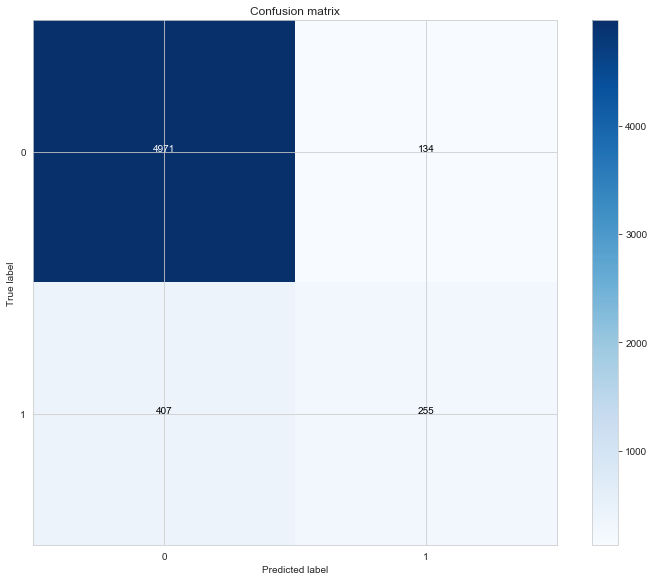

In [98]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y2_pred)
np.set_printoptions(precision=2)


class_names = [0,1]

plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

**Export Submission Dataset**

In [99]:
test_df.drop(['subscribed'], axis=1, inplace=True)
test_df.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,59,6.183333,1,999,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,4.750000,2,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,35,0.866667,1,999,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,38,5.916667,4,999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,29,3.150000,2,999,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [100]:
predictions = model2.predict(test_df)

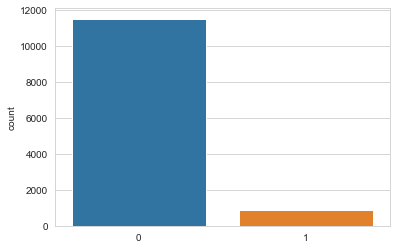

In [102]:
sns.countplot(predictions)

In [103]:
test_df.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,59,6.183333,1,999,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,4.750000,2,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,35,0.866667,1,999,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,38,5.916667,4,999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,29,3.150000,2,999,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [104]:
test['customer_id']

0        customer_id_32884
1         customer_id_3169
2        customer_id_32206
3         customer_id_9403
4        customer_id_14020
               ...        
12352    customer_id_15908
12353    customer_id_28222
12354    customer_id_14194
12355    customer_id_19764
12356    customer_id_26052
Name: customer_id, Length: 12357, dtype: object

In [105]:
sample_sub.head()

,customer_id,subscribed
0,customer_id_32884,1
1,customer_id_3169,1
2,customer_id_32206,1
3,customer_id_9403,1
4,customer_id_14020,1


In [101]:
predictions.shape

(12357,)

In [106]:
sample_sub.shape

(12357, 2)

In [108]:
preds = pd.DataFrame({"customer_id": sample_sub["customer_id"],"subscribed": predictions})

In [110]:
preds.tail()

,customer_id,subscribed
12352,customer_id_15908,0
12353,customer_id_28222,1
12354,customer_id_14194,0
12355,customer_id_19764,0
12356,customer_id_26052,0


In [111]:
preds.to_csv("aisub1.csv", index=False)